In [114]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [59]:
and_data = pd.DataFrame({"input1":[1, 1, 0, 0], 
                         "input2":[1, 0, 1, 0], 
                         "output": [1, 0, 0, 0]})
or_data = pd.DataFrame({"input1":[1, 1, 0, 0], 
                         "input2":[1, 0, 1, 0], 
                         "output": [1, 1, 1, 0]})
xor_data = pd.DataFrame({"input1":[1, 1, 0, 0], 
                         "input2":[1, 0, 1, 0], 
                         "output": [0, 1, 1, 0]})

In [60]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [61]:
or_data

,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [62]:
xor_data

,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


/tmp/ipykernel_7518/4010340136.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


Text(0.5, 1.0, 'XOR')

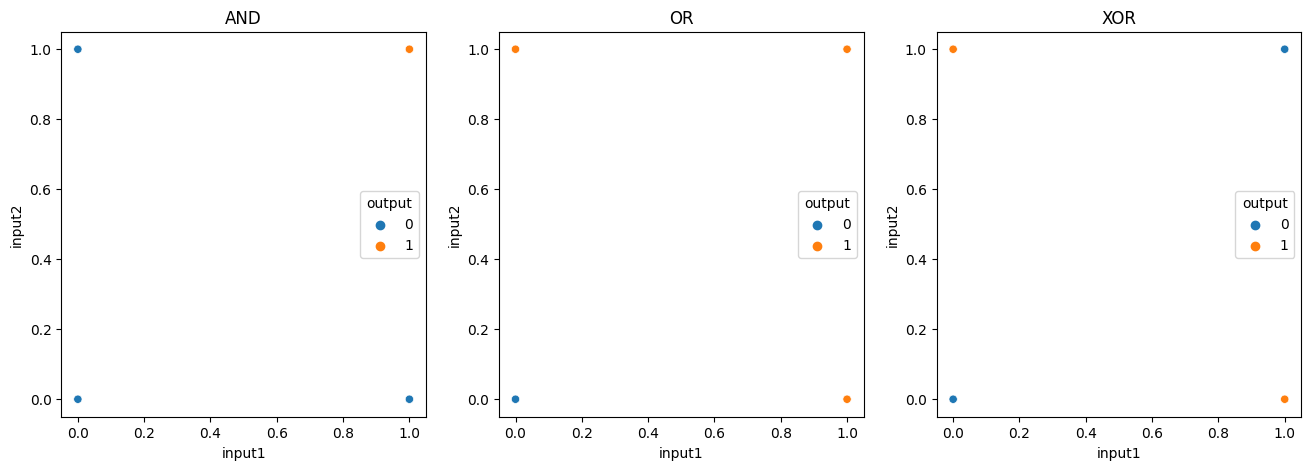

In [63]:
fig = plt.subplots(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=and_data["input1"], y=and_data["input2"], hue=and_data["output"])
plt.title("AND")

plt.subplot(1, 3, 2)
sns.scatterplot(x=or_data["input1"], y=or_data["input2"], hue=or_data["output"])
plt.title("OR")

plt.subplot(1,3, 3)
sns.scatterplot(x=xor_data["input1"], y=xor_data["input2"], hue=xor_data["output"])
plt.title("XOR")

In [64]:
and_X = and_data.iloc[:, 0:2]
and_y = and_data.iloc[:, -1]

or_X = or_data.iloc[:, 0:2]
or_y = or_data.iloc[:, -1]

xor_X = xor_data.iloc[:, 0:2]
xor_y = xor_data.iloc[:, -1]

In [67]:
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

In [68]:
clf1.fit(and_X, and_y)
clf2.fit(or_X, or_y)
clf3.fit(xor_X, xor_y)

Perceptron()

In [72]:
print(f"Coefficients of classifier1 are: {clf1.coef_} and intercept is: {clf1.intercept_}")
print(f"Coefficients of classifier1 are: {clf2.coef_} and intercept is: {clf2.intercept_}")
print(f"Coefficients of classifier1 are: {clf3.coef_} and intercept is: {clf3.intercept_}")

Coefficients of classifier1 are: [[2. 2.]] and intercept is: [-2.]
Coefficients of classifier1 are: [[2. 2.]] and intercept is: [-1.]
Coefficients of classifier1 are: [[0. 0.]] and intercept is: [0.]


In [109]:
m1 = -(clf1.coef_[0][0]/clf1.coef_[0][1])
c1 = -(clf1.intercept_[0]/clf1.coef_[0][1])

m2 = -(clf2.coef_[0][0]/clf2.coef_[0][1])
c2 = -(clf2.intercept_[0]/clf2.coef_[0][1])

m3 = -(clf3.coef_[0][0]/clf3.coef_[0][1])
c3 = -(clf3.intercept_[0]/clf3.coef_[0][1])

/tmp/ipykernel_7518/2436804913.py:7: RuntimeWarning: invalid value encountered in scalar divide
  m3 = -(clf3.coef_[0][0]/clf3.coef_[0][1])
/tmp/ipykernel_7518/2436804913.py:8: RuntimeWarning: invalid value encountered in scalar divide
  c3 = -(clf3.intercept_[0]/clf3.coef_[0][1])


In [110]:
x1_input = np.linspace(-1, 1, 6)
y1_input = (m1 * x1_input) + c1

x2_input = np.linspace(-1, 1, 6)
y2_input = (m2 * x2_input) + c2

x3_input = np.linspace(-1, 1, 6)
y3_input = (m3 * x3_input) + c3

/tmp/ipykernel_7518/1350337903.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


<Axes: xlabel='input1', ylabel='input2'>

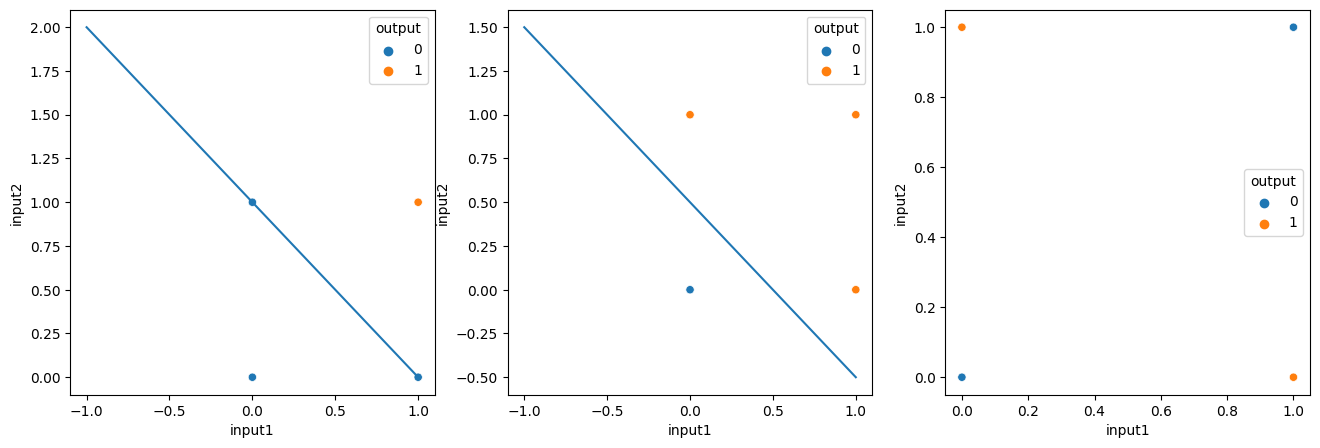

In [112]:
fig = plt.subplots(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(x1_input, y1_input)
sns.scatterplot(x=and_data["input1"], y=and_data["input2"], hue=and_data["output"])

plt.subplot(1, 3, 2)
plt.plot(x2_input, y2_input)
sns.scatterplot(x=or_data["input1"], y=or_data["input2"], hue=or_data["output"])

plt.subplot(1, 3, 3)
plt.plot(x3_input, y3_input)
sns.scatterplot(x=xor_data["input1"], y=xor_data["input2"], hue=xor_data["output"])

/home/babar/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

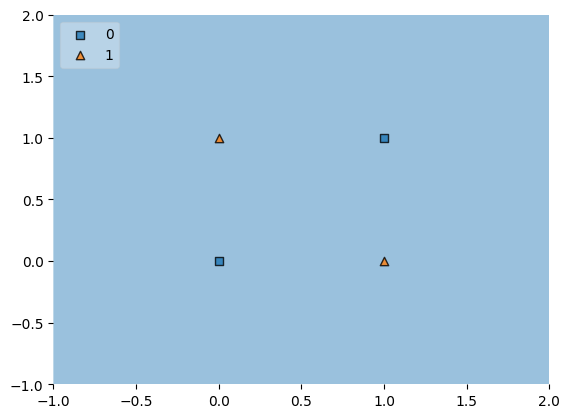

In [116]:
plot_decision_regions(xor_X.values, xor_y.values, clf=clf3, legend=2)

# **Conclusion**
<br>
Perceptron is limited to linear data. It cannot work properly on non-linear data. As we have seen while plotting that the xor_data was not separable because all the points were in the cross position to each other. Plot decion region of xor_data is anothe evidence to the said conclusion. 